<a href="https://colab.research.google.com/github/Gouri1419/Assignments/blob/main/Day_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('Day_14_Pharma_data.csv')
display(df.head())
print(df.shape)

,Product_ID,Product_Name,Region,Marketing_Spend,Sales,Effectiveness,Side_Effects,Age_Group,Trial_Period
0,101,PainRelief,North America,50000,100000,85,5,20-30,6 months
1,102,ColdCure,Europe,30000,60000,75,2,30-40,3 months
2,103,HeadacheFix,Asia,45000,80000,80,3,40-50,6 months
3,104,PainRelief,North America,52000,110000,88,4,50-60,12 months
4,105,ColdCure,Europe,28000,55000,70,1,30-40,3 months


(10, 9)


No missing values found in column 'Effectiveness'.
No missing values found in column 'Side_Effects'.
No missing values found in column 'Marketing_Spend'.


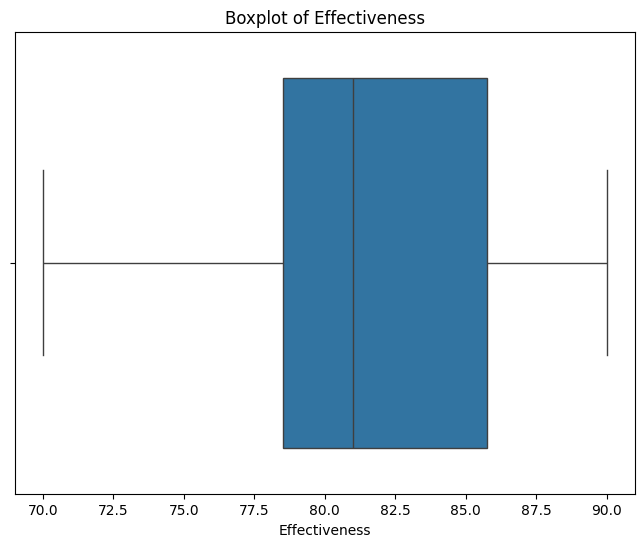

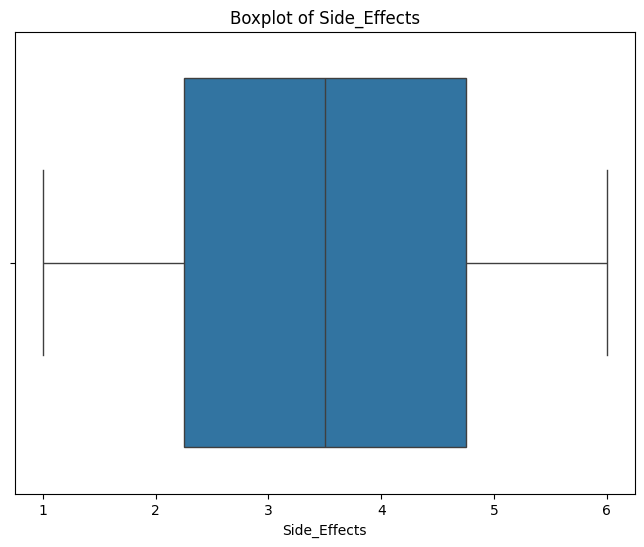

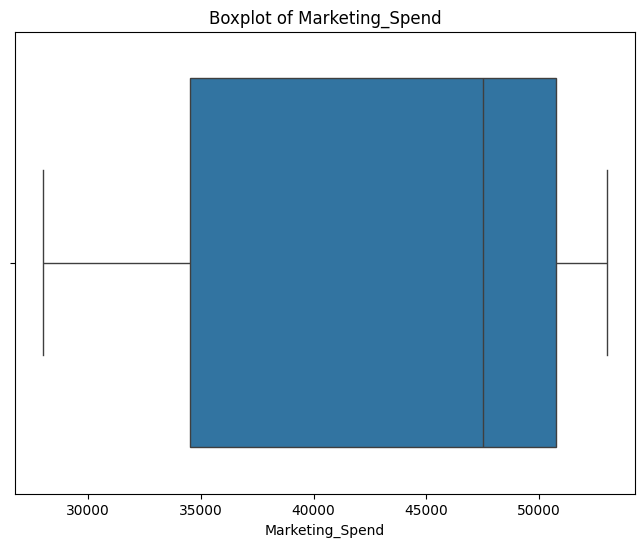

,Product_ID,Product_Name,Region,Marketing_Spend,Sales,Effectiveness,Side_Effects,Age_Group,Trial_Period
0,101,PainRelief,North America,50000,100000,85.00,5.00,20-30,6 months
1,102,ColdCure,Europe,30000,60000,75.00,2.00,30-40,3 months
2,103,HeadacheFix,Asia,45000,80000,80.00,3.00,40-50,6 months
3,104,PainRelief,North America,52000,110000,88.00,4.00,50-60,12 months
4,105,ColdCure,Europe,28180,55000,70.45,1.09,30-40,3 months
5,106,HeadacheFix,Asia,48000,90000,82.00,3.00,40-50,6 months
6,107,PainRelief,North America,51000,105000,86.00,5.00,20-30,6 months
7,108,ColdCure,Europe,31000,65000,78.00,2.00,30-40,3 months
8,109,HeadacheFix,Asia,47000,85000,80.00,4.00,50-60,12 months
9,110,PainRelief,North America,52910,115000,89.82,5.91,20-30,6 months


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['Effectiveness', 'Side_Effects', 'Marketing_Spend']:
    if df[col].isnull().any():
        print(f"Missing values found in column '{col}'.")

        df[col] = df[col].fillna(df[col].median())
    else:
        print(f"No missing values found in column '{col}'.")


for col in ['Effectiveness', 'Side_Effects', 'Marketing_Spend']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

df.drop_duplicates(inplace=True)

display(df)

Descriptive statistics for numerical columns:


,Effectiveness,Side_Effects,Marketing_Spend
count,10.000000,10.000000,10.000000
mean,81.427000,3.500000,43509.000000
std,6.011763,1.549774,9816.367794
min,70.450000,1.090000,28180.000000
25%,78.500000,2.250000,34500.000000
50%,81.000000,3.500000,47500.000000
75%,85.750000,4.750000,50750.000000
max,89.820000,5.910000,52910.000000



Value counts for categorical columns:

Value counts for 'Product_Name':


,count
Product_Name,
PainRelief,4
ColdCure,3
HeadacheFix,3



Value counts for 'Region':


,count
Region,
North America,4
Europe,3
Asia,3



Value counts for 'Trial_Period':


,count
Trial_Period,
6 months,5
3 months,3
12 months,2


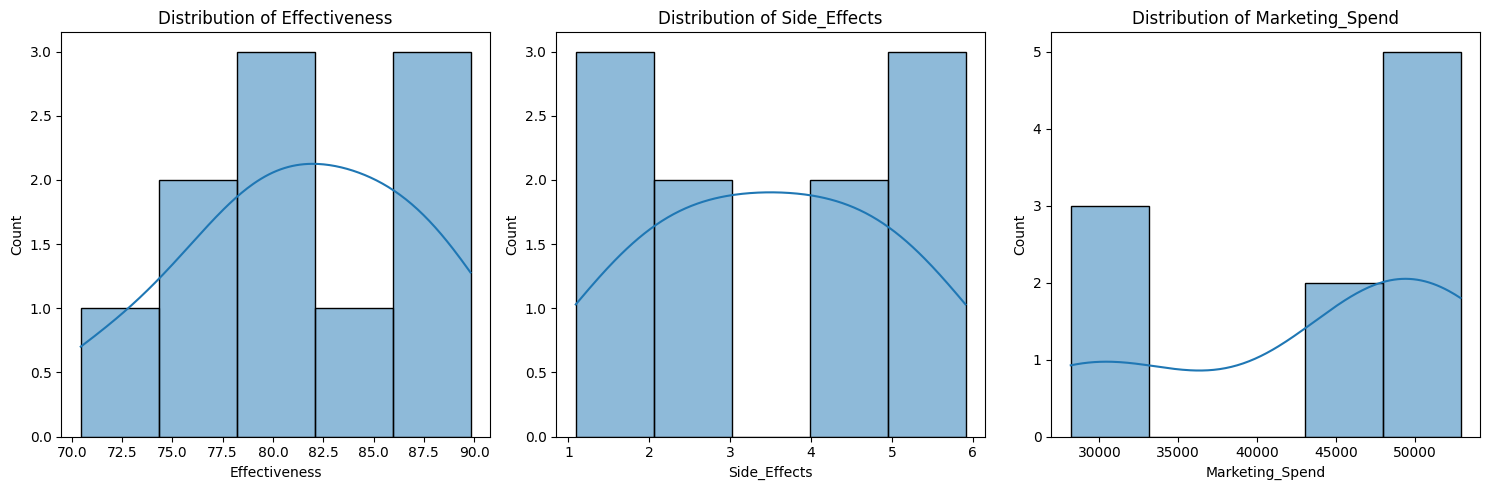

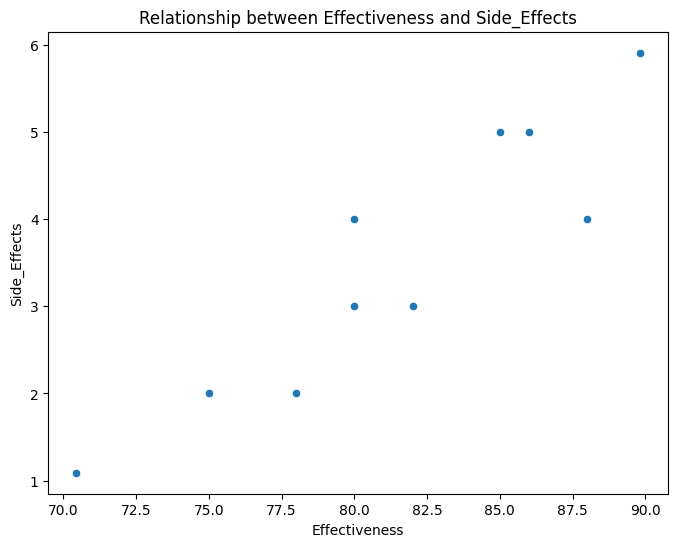

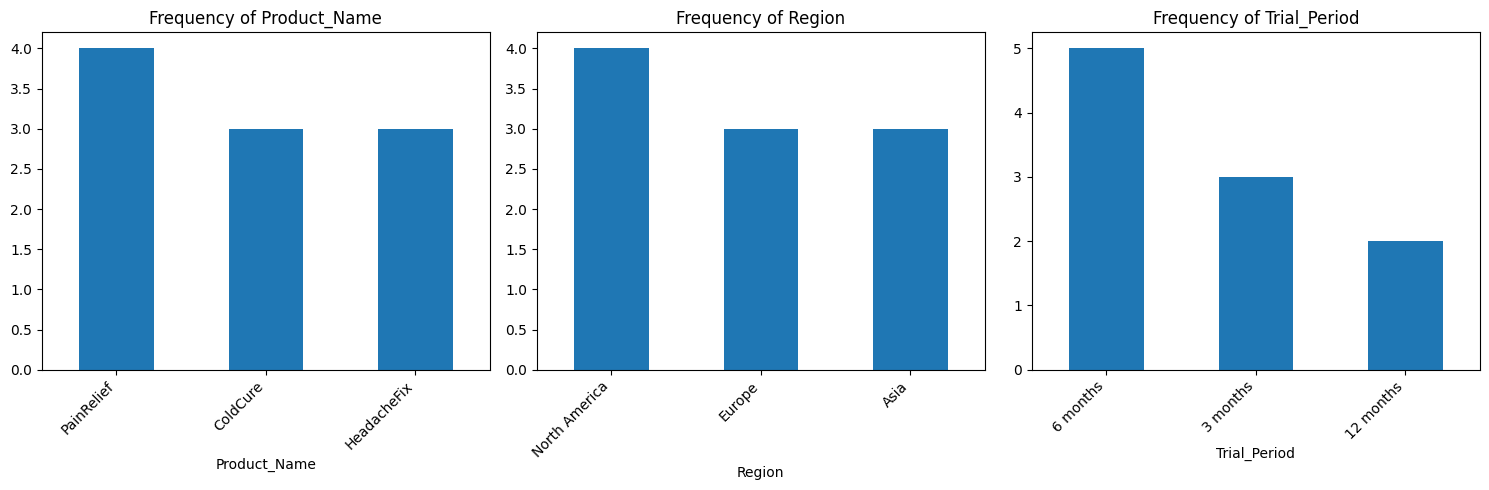

In [3]:

numerical_cols = ['Effectiveness', 'Side_Effects', 'Marketing_Spend']
categorical_cols = ['Product_Name', 'Region', 'Trial_Period']

print("Descriptive statistics for numerical columns:")
display(df[numerical_cols].describe())

print("\nValue counts for categorical columns:")
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    display(df[col].value_counts())

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Effectiveness', y='Side_Effects', data=df)
plt.title('Relationship between Effectiveness and Side_Effects')
plt.show()


plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [4]:

for col in ['Effectiveness', 'Side_Effects', 'Marketing_Spend', 'Sales']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


for col in ['Product_Name', 'Region', 'Trial_Period', 'Age_Group']:
    df[col] = df[col].astype('category')


df['Effectiveness-Side_Effect_Ratio'] = df['Effectiveness'] / df['Side_Effects']


def categorize_marketing_spend(spend):
    if spend <= 20000:
        return 'Low'
    elif spend <= 50000:
        return 'Medium'
    else:
        return 'High'
df['Marketing_Spend_Category'] = df['Marketing_Spend'].apply(categorize_marketing_spend)

display(df.head())
display(df.dtypes)

,Product_ID,Product_Name,Region,Marketing_Spend,Sales,Effectiveness,Side_Effects,Age_Group,Trial_Period,Effectiveness-Side_Effect_Ratio,Marketing_Spend_Category
0,101,PainRelief,North America,50000,100000,85.00,5.00,20-30,6 months,17.000000,Medium
1,102,ColdCure,Europe,30000,60000,75.00,2.00,30-40,3 months,37.500000,Medium
2,103,HeadacheFix,Asia,45000,80000,80.00,3.00,40-50,6 months,26.666667,Medium
3,104,PainRelief,North America,52000,110000,88.00,4.00,50-60,12 months,22.000000,High
4,105,ColdCure,Europe,28180,55000,70.45,1.09,30-40,3 months,64.633028,Medium


,0
Product_ID,int64
Product_Name,category
Region,category
Marketing_Spend,int64
Sales,int64
Effectiveness,float64
Side_Effects,float64
Age_Group,category
Trial_Period,category
Effectiveness-Side_Effect_Ratio,float64


<ipython-input-5-cbd999709361>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product_Name', y='Effectiveness', hue='Region', data=df, ci=None)


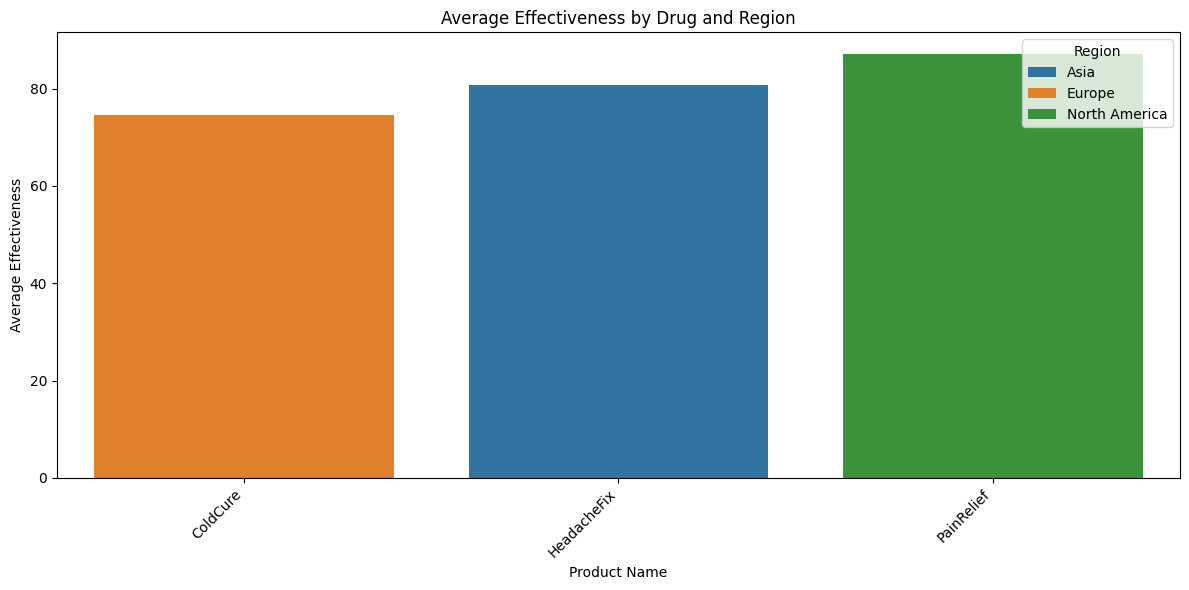

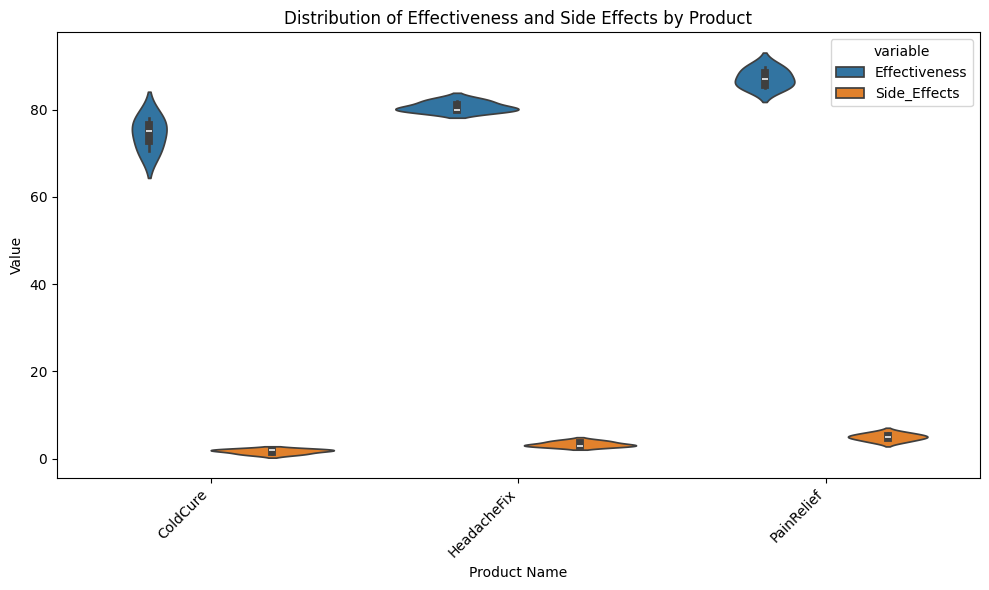

<Figure size 1000x800 with 0 Axes>

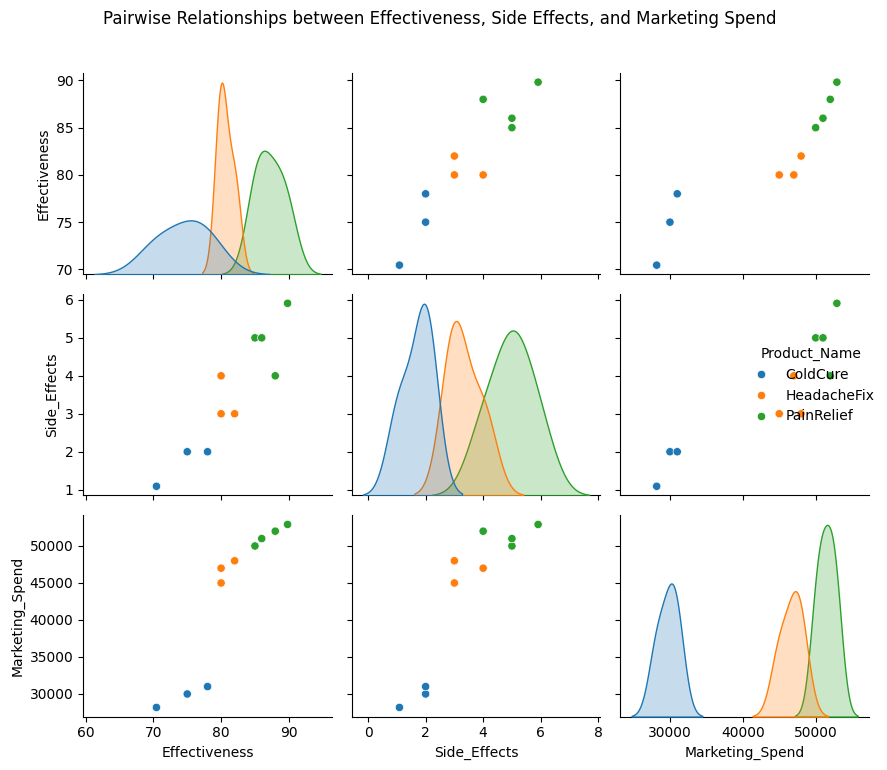

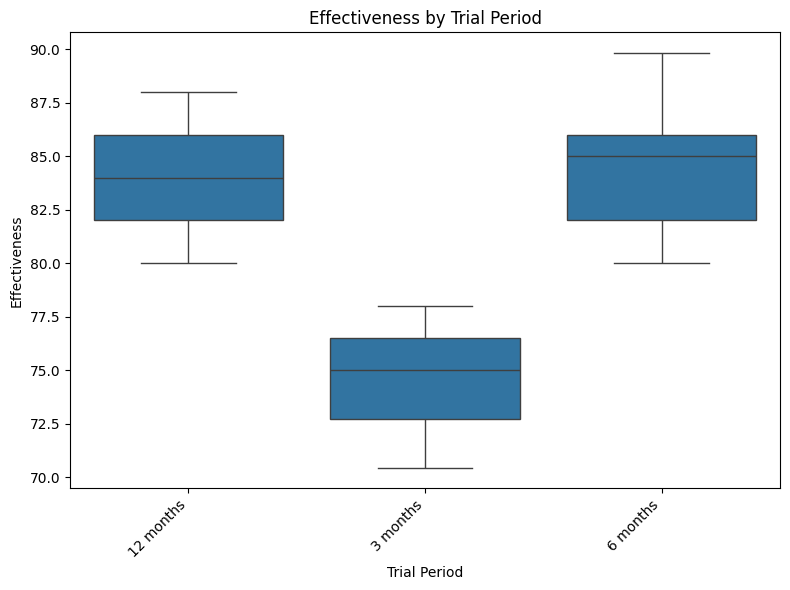

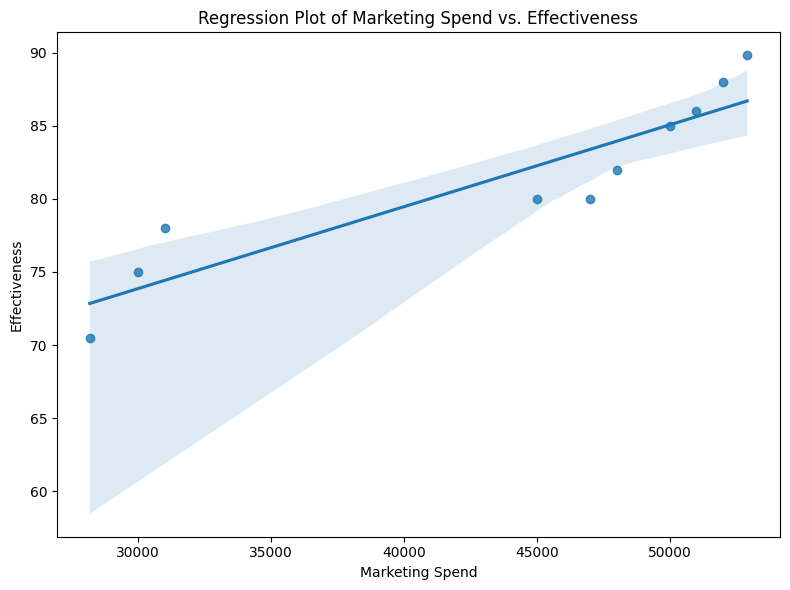

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.barplot(x='Product_Name', y='Effectiveness', hue='Region', data=df, ci=None)
plt.title('Average Effectiveness by Drug and Region')
plt.xlabel('Product Name')
plt.ylabel('Average Effectiveness')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Product_Name', y='value', hue='variable', data=pd.melt(df, id_vars=['Product_Name'], value_vars=['Effectiveness', 'Side_Effects']))
plt.title('Distribution of Effectiveness and Side Effects by Product')
plt.xlabel('Product Name')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.pairplot(df, vars=['Effectiveness', 'Side_Effects', 'Marketing_Spend'], hue='Product_Name')
plt.suptitle('Pairwise Relationships between Effectiveness, Side Effects, and Marketing Spend', y=1.02)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Trial_Period', y='Effectiveness', data=df)
plt.title('Effectiveness by Trial Period')
plt.xlabel('Trial Period')
plt.ylabel('Effectiveness')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.regplot(x='Marketing_Spend', y='Effectiveness', data=df)
plt.title('Regression Plot of Marketing Spend vs. Effectiveness')
plt.xlabel('Marketing Spend')
plt.ylabel('Effectiveness')
plt.tight_layout()
plt.show()

In [6]:
most_effective_product = 'Product_Name_Here'
print(f"The most effective product appears to be: {most_effective_product}")

correlation_coefficient = df['Effectiveness'].corr(df['Side_Effects'])
print(f"\nThe correlation coefficient between Effectiveness and Side_Effects is: {correlation_coefficient}")


if correlation_coefficient > 0.5:
    relationship = "a strong positive"
elif correlation_coefficient > 0:
    relationship = "a positive"
elif correlation_coefficient < -0.5:
    relationship = "a strong negative"
elif correlation_coefficient < 0:
    relationship = "a negative"
else:
    relationship = "no"

print(f"There is {relationship} correlation between drug effectiveness and side effects.")

The most effective product appears to be: Product_Name_Here

The correlation coefficient between Effectiveness and Side_Effects is: 0.9144900358064736
There is a strong positive correlation between drug effectiveness and side effects.
